In [1]:
%run talktools
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns
#sns.set_style('whitegrid')
from IPython.display import Image, display 

<h1><div align='left'> Open Source can improve current scientific practice</div></h1>

<h3>Ipython notebooks are a great tool to support this</h3>
**Sophie Balemans** and **Stijn Van Hoey**

*EGU 2015 - PICO session on Open Source Computing in Hydrology*

# The ideals of (hydrological) science

* Provide verifiable answers about water and solutions to water-related problems.
* The validation of these results by reproduction.
* An altruistic, collective enterprise for humanity's benefit

*F Perez*

# The <span class="strike">ideals</span> reality of (hydrological) science

* <span class="strike">Provide verifiable answers about water and solutions to water-related problems.</span>
 - **The pursuit of highly cited papers for your CV.**
* <span class="strike">The validation of our results by reproduction.</span>
 - **Validation by convincing journal referees who didn't see your code or data.**
* <span class="strike">An altruistic, collective enterprise  for humanity's benefit.</span>
 - **A deadly race to outrun your colleagues in front of the bear of funding.**

*F Perez*

# Free and Open Source Software (FOSS) in this context

* <span class="emph">Open, collaborative by definition.</span>
  - Industrial competition can coexist...
  
* <span class="emph">Continuous</span>, public process.
  - Distributed credit.
  - Open peer review.

* <span class="emph">Reproducible by necessity.</span>

* <span class="emph">Public bug tracking.</span>

* The use of <span class="emph">licenses</span> is essential ([CC, BSD, GPL,...](http://choosealicense.com/))

*F Perez*

# FOSS $\neq$ free work
<center><img src="figs/workfree.png" width="70%"></center>

# All waiting for the developer...

<center><img src="figs/crowd.jpg" width="70%"></center>

<div class="center"><h2>...or all developers?</h2></div>

# Graveyard of good intentions
<center><img src="figs/graveyard.jpg" width="70%"></center>

# Towards *continuous* and *collaborative*

What do we need:

* <span class="emph">Training</span>  of students, Phds,... <br>*Creating a future generation of scientists with reproducibility as default*<br> Provide version control, script-based development, database management... in the curricula
*  <span class="emph">Continuous funding</span>  of open source development<br>*Payed to maintain and develop open source projects*
* <span class="emph">Tools</span> that facilitate a reproducible workflow<br>*[knitr](http://yihui.name/knitr/), [Ipython Notebook](http://ipython.org/notebook.html), [git](http://git-scm.com/), [RunMyCode](http://www.runmycode.org/), [VIStrails](http://www.vistrails.org), [Authorea](https://www.authorea.com),...*


<div class="center"><h2>Ipython Notebook</h2></div>

# Reproducible science

* Reproducibility <span class="emph">at publication time?</span>  is **TOO late!**

We need to embed the <span class="emph">entire lifecycle</span> of a scientific idea:

1. exploratory stuff
2. (collaborative) development
3. production (simulations on HPC, data visualisation,...)
4. publication (with <span class="warn">reproducible</span> results)
5. teach about it
6. Go back to 1.

**Ipython (Jupyter!) Notebook** can support on the different levels

**Ipython (Jupyter!) Notebook...** (*this is a notebook!*)

<div class="center"><h3>Minimize effort between analysis and sharing</h3></div>

<center><img src="figs/IPynbWorkflows.png" width="70%"></center>

* Interactive shell for data-analysis and exploration
* Interaction between languages (R, Julia,...)
* Parallel computing
* ipynb to latex, pdf, html, html,slides, publications, books,...
* Loading of images, websites, widgets,...
* ...

Check it out on https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks

# Scripts, so it can be *version controlled!*
<center><img src="figs/version-control.jpg" width="70%"></center>

# Recap *5. teach about it*

* The same file can be used to do analysis, create course notes and retrieve slides using <span class="emph">nbconvert</span>
* Students can <span class="emph">interactively</span> work on their notebook
* Different useful <span class="emph">features</span>: eg. 
<div class="center"><h2>interactive widgets</h2></div>

## Conceptual rainfall-runoff model

<br/>

<center><img src="figs/PDM_adapted.png" width="80%"></center>




In [2]:
# %load PDM_HPC.py

In [3]:
pars =pd.read_csv('data/example2_PDM_parameters.txt',header=0, sep=',', index_col=0)
measured = pd.read_csv('data/example_PDM_measured.txt', header=0, sep='\t', decimal='.', index_col=0)
modelled = pd.read_csv('data/example2_PDM_outputs.txt',header=0, sep=',', index_col=0).T

In [4]:
modeloutput1 = pd.DataFrame(modelled.iloc[:,0].values, index=measured.index)

Measured vs modelled discharge:

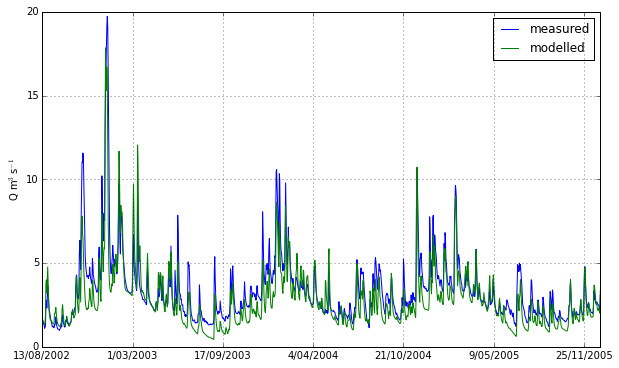

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
p1 = measured.plot(ax=ax, label='measured')
p2 = modeloutput1.plot(ax=ax, label='modelled')
t = ax.set_ylabel(r'Q m$^3$s$^{-1}$')
plt.legend(['measured', 'modelled'])

plt.savefig('plot.png')

In [6]:
from scatter_hist_season import create_scatterhist, create_seasonOF

time=np.array(measured.index)
modelled.index = time



# Exploring the parameter space

* Simulating 20000 <span class="emph">Monte-Carlo</span> runs 
* Sampling from <span class="emph">uniform distribution</span> 

* <span class="emph">Parallel</span> calculation within IPython notebook 

In [7]:
objective_functions = create_seasonOF(modelled, measured)

### Visualisation in 2D scatter plot

In [8]:
from scatter_hist_season import create_scatterhist

Current threshold = 674.854206156
Number of behavioural parametersets = 7910 out of 20000


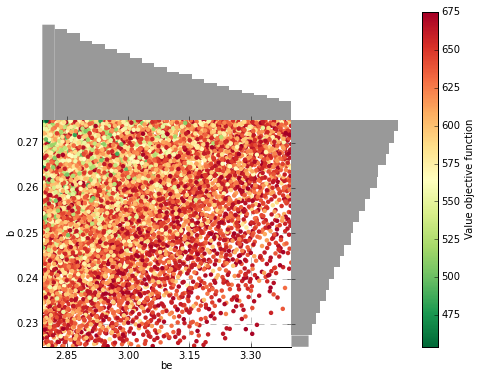

In [11]:
scatter = create_scatterhist(pars, 'be', 'b', objective_functions,  
                                            objective_function='SSE', 
                                            threshold=0.4,  
                                            season = 'Winter')

Current threshold = 105.663890284
Number of behavioural parametersets = 9592 out of 20000


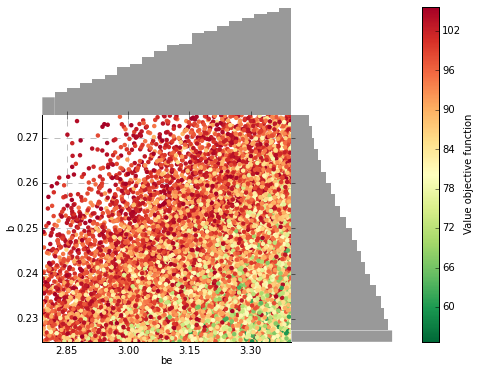

In [12]:
scatter = create_scatterhist(pars, 'be', 'b', objective_functions,  
                                            objective_function='SSE', 
                                            threshold=0.4,
                                            season = 'Spring')

### What about the model?

- Parameter boundaries correct?
- Optimal paramersets change periodically... Correct model structure?
- **NOT** an optimization tool!

### The function
- Select parametersets based on: 
    1. Objective function (SSE, RMSE, RRMSE)
    2. Time period of interest (whole year or specific season) 
    3. Relative threshold (scaled between 0 and 1)
- Visualisation of a 2D parameter response surface of selected parametersets together with histograms

## More interactive?

### command:  
    
    interact(...)

In [13]:
#Loading interact functionality
from IPython.html.widgets import interact, fixed  

:0: FutureWarning: IPython widgets are experimental and may change in the future.



    interact(create_scatterhist,*args, **kwargs)

* input list  => <span class='emph'>dropdown</span>
        objective_function = ['SSE', 'RMSE', 'RRMSE']
        season = ['Winter','Summer', 
                        'Spring', 'Autumn','All season']

* input array  => <span class='emph'>slider</span>
        threshold=(0,1,0.005)

<center><img src="figs/example2_winter_boven.png" width="60%"></center>
<center><img src="figs/example2_04.png" width="70%"></center>

Current threshold = 702.451221611
Number of behavioural parametersets = 10328 out of 20000


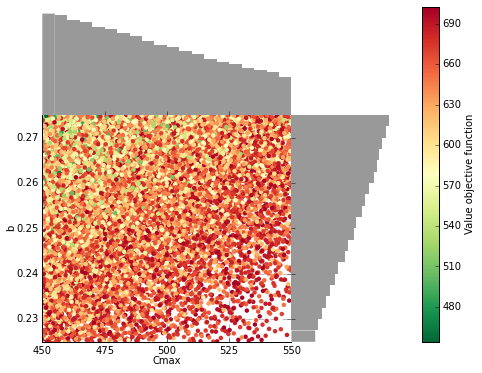

In [56]:
scatter =  interact(create_scatterhist,
                    all_parameters=fixed(pars),
                    parameter1=pars.columns.tolist(),
                    parameter2=pars.columns.tolist(),
                    objective=fixed(objective_functions),  
                    xbinwidth = (0.05,1,0.05), ybinwidth = (0.05,1,0.05),
                    objective_function= ['SSE','RMSE','RRMSE'],
                    threshold=(0,1,0.05),
                    season = ['Winter','Summer','Autumn','Spring','All_seasons'])

# Ipython notebook...

<center><img src="figs/mcgyver.jpg" width="60%"></center>
egu